¡Hola, Edgar!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:












<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
Se realizaron los cambios solicitados.
</div>


# Análisis de Pruebas A/B

## Objetivos del Estudio
Verificar si la prueba A/B se ejecuto correctamente.
  
Comprobar si hubo cambios entre el nuevo sistema de recomendaciones con el sistema de recomendaciones anterior, especificamente en las siguientes etapas:

    * Conversion en visitas de la pagina del producto (product_page).
    * Instancias de agregar articulos al carrito de compras (product_cart).
    * Finalizacion de compras (purchase).
  

Determinar si el nuevo sistema logra al menos un 10% de aumento en cada etapa.
  

## Exploracion de los Datos

In [1]:
import pandas as pd

In [2]:
eventos_2020= pd.read_csv('/datasets/ab_project_marketing_events_us.csv')
nuevos_usuarios= pd.read_csv('/datasets/final_ab_new_users_upd_us.csv')
eventos_prueba= pd.read_csv('/datasets/final_ab_events_upd_us.csv')
participantes= pd.read_csv('/datasets/final_ab_participants_upd_us.csv')

**¿Es necesario convertir los tipos?**

In [3]:
eventos_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


In [4]:
eventos_2020['start_dt'] = pd.to_datetime(eventos_2020['start_dt'])
eventos_2020['finish_dt'] = pd.to_datetime(eventos_2020['finish_dt'])

In [5]:
nuevos_usuarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [16]:
nuevos_usuarios['region'].value_counts()

EU           39466
N.America     8243
CIS           2875
APAC          2856
Name: region, dtype: int64

In [6]:
nuevos_usuarios['first_date']= pd.to_datetime(nuevos_usuarios['first_date'])

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
La region es correcta y su tipo de dato tambien.
</div>


In [7]:
eventos_prueba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


In [8]:
eventos_prueba['event_dt']= pd.to_datetime(eventos_prueba['event_dt'])

In [9]:
participantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB



----
Solamente se tuvo que convertir las columnas de fechas a tipo datatime

----


**¿Hay valores ausentes o duplicados? Si es así, ¿cómo los caracterizarías?**

In [10]:
print(eventos_2020.isnull().sum())
print()
print(f"Hay {eventos_2020.duplicated().sum()} duplicados")

name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64

Hay 0 duplicados


In [11]:
print(nuevos_usuarios.isnull().sum())
print()
print(f"Hay {nuevos_usuarios.duplicated().sum()} duplicados")

user_id       0
first_date    0
region        0
device        0
dtype: int64

Hay 0 duplicados


In [12]:
print(eventos_prueba.isnull().sum())
print()
print(f"Hay {eventos_prueba.duplicated().sum()} duplicados")

user_id            0
event_dt           0
event_name         0
details       363447
dtype: int64

Hay 0 duplicados


In [13]:
print(participantes.isnull().sum())
print()
print(f"Hay {participantes.duplicated().sum()} duplicados")

user_id    0
group      0
ab_test    0
dtype: int64

Hay 0 duplicados


----
En el caso del dataset de eventos_prueba, solamente hay datos ausentes en la columna details, esto es porque solamente hay datos en el evento de purchase y en los demas eventos los considera como dato ausente.

Decidi dejar los datos ausentes asi como estan para conservar el tipo float y asi poder calcular el pedido total en USD para los eventos purchase

----

In [14]:
# Verificar que consideramos los primeros 14 días desde que se registraron los usuarios
print(nuevos_usuarios['first_date'].min())
print(nuevos_usuarios['first_date'].max())


dias_de_inscripcion = nuevos_usuarios['first_date'].max() - nuevos_usuarios['first_date'].min()
dias_de_inscripcion


2020-12-07 00:00:00
2020-12-23 00:00:00


Timedelta('16 days 00:00:00')


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
Aqui podemos ver que la columna 'first_date' contempla 16 dias, osea que contempla dos dias de mas por que la fecha en la que dejaron de aceptar nuevos usuarios fue el 2020-12-21 y los datos estan hasta 2020-12-23.
</div>


In [15]:
nuevos_usuarios=nuevos_usuarios.query('first_date <= "2020-12-21"')

print(nuevos_usuarios['first_date'].min())
print(nuevos_usuarios['first_date'].max())
dias_de_inscripcion = nuevos_usuarios['first_date'].max() - nuevos_usuarios['first_date'].min()
dias_de_inscripcion

2020-12-07 00:00:00
2020-12-21 00:00:00


Timedelta('14 days 00:00:00')

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
En la celda anterior corregi los dias a considerar para los ususarios nuevos que son los primeros 14 dias.
</div>


<div class="alert alert-block alert-danger">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Excelente trabajo,  solamente recuerda realizar los siguientes filtros que nos mencionan en el proyecto:



    - Verificar que consideramos los primeros 14 días desde que se registraron los usuarios
    - Que la región es la correcta
    - Que las pruebas son las de interes en el proyecto



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

## Analisis Exploratorio de Datos (EDA)

**Estudia la conversión en las diferentes etapas del embudo.**

In [18]:
usuarios_por_etapa = eventos_prueba.groupby('event_name')['user_id'].nunique()

In [19]:
tasa_conversion_login_product_page = (usuarios_por_etapa['product_page'] / usuarios_por_etapa['login']) * 100
print(f"Tasa de conversión de 'login' a 'product_page': {tasa_conversion_login_product_page:.2f}%")


Tasa de conversión de 'login' a 'product_page': 66.32%


In [20]:
tasa_conversion_product_page_cart = (usuarios_por_etapa['product_cart'] / usuarios_por_etapa['product_page']) * 100
print(f"Tasa de conversión de 'product_page' a 'product_cart': {tasa_conversion_product_page_cart:.2f}%")

Tasa de conversión de 'product_page' a 'product_cart': 49.54%


In [21]:
tasa_conversion_product_cart_purchase = (usuarios_por_etapa['purchase'] / usuarios_por_etapa['product_cart']) * 100
print(f"Tasa de conversión de 'product_cart' a 'purchase': {tasa_conversion_product_cart_purchase:.2f}%")

Tasa de conversión de 'product_cart' a 'purchase': 101.47%


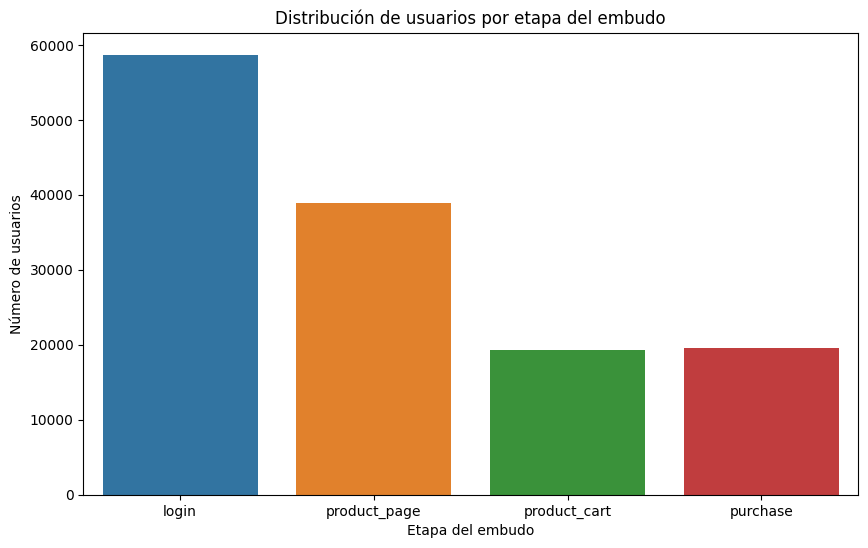

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

orden = ['login', 'product_page', 'product_cart', 'purchase']

usuarios_por_etapa_ordenado = usuarios_por_etapa.reindex(orden)

plt.figure(figsize=(10, 6))
sns.barplot(x=usuarios_por_etapa_ordenado.index, y=usuarios_por_etapa_ordenado.values)
plt.xlabel('Etapa del embudo')
plt.ylabel('Número de usuarios')
plt.title('Distribución de usuarios por etapa del embudo')
plt.show()

In [23]:
usuarios_que_compraron = set(eventos_prueba[eventos_prueba['event_name'] == 'purchase']['user_id'])
usuarios_en_el_carrito = set(eventos_prueba[eventos_prueba['event_name'] == 'product_cart']['user_id'])

compras_sin_carrito = usuarios_que_compraron - usuarios_en_el_carrito

print(f"Número total de usuarios únicos con compras: {len(usuarios_que_compraron)}")
print(f"Número de usuarios que compraron pero no pasaron por el carrito: {len(compras_sin_carrito)}")

Número total de usuarios únicos con compras: 19568
Número de usuarios que compraron pero no pasaron por el carrito: 13169


----
**Observaciones y Resumen de la Anomalía**

El análisis ha revelado una anomalía significativa donde **13,169 usuarios** han registrado un evento de `purchase` sin un evento previo de `product_cart`.

Esta anomalía podría deberse a varias razones:

1.  **Omisión de Eventos**: Posiblemente, el evento `product_cart` no se está registrando correctamente para ciertos tipos de compras o usuarios (ej. compras directas, compras de un solo clic, suscripciones, etc.).
2.  **Flujos de Usuario Alternativos**: Existen caminos de usuario donde el `product_cart` no es un paso obligatorio antes de la compra (ej. comprar ahora, re-compra de un producto anterior, compra desde una notificación, etc.).
3.  **Desincronización de Timestamps**: Aunque el `event_dt` se ha convertido a datetime, las marcas de tiempo a veces parecen estar desordenadas o ser idénticas para eventos lógicamente secuenciales, lo que podría indicar un problema en el ordenamiento o registro de los eventos.

----


**¿El número de eventos por usuario está distribuido equitativamente entre las muestras?**

In [25]:
participantes_prueba=participantes.query('ab_test== "recommender_system_test"')

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
En el codigo anterior podemos ver que se filtró el dataset para ver solamente las pruebas de interes.
</div>


In [26]:
tabla_combinada = pd.merge(eventos_prueba, participantes_prueba, on='user_id', how='inner')
eventos_por_usuario = tabla_combinada.groupby('group')['user_id'].size().reset_index(name='num_events')

eventos_por_usuario

,group,num_events
0,A,18627
1,B,5282


----
Podemos ver que hay mucha diferencia de numero de eventos entre los grupos A y B, habiendo una diferencia de 13,345 eventos podemos decir que el numero de eventos por usuario no esta distribuido equitativamente.

----


**¿Hay usuarios que están presentes en ambas muestras?**

In [27]:
tabla_combinada.groupby('user_id').nunique()['group'].max()

1

----
Con el codigo de la celda anterior podemos observar que no hay usuarios que esten en ambos grupos.

----

**¿Cómo se distribuye el número de eventos entre los días?**

In [28]:
eventos_por_dia = tabla_combinada.groupby('event_dt').size().reset_index(name='num_events')
eventos_por_dia['dia'] = eventos_por_dia['event_dt'].dt.date
eventos_por_dia = eventos_por_dia.groupby('dia').size().reset_index(name='num_events')
eventos_por_dia


,dia,num_events
0,2020-12-07,477
1,2020-12-08,418
2,2020-12-09,501
3,2020-12-10,430
4,2020-12-11,388
5,2020-12-12,400
6,2020-12-13,350
7,2020-12-14,912
8,2020-12-15,875
9,2020-12-16,952


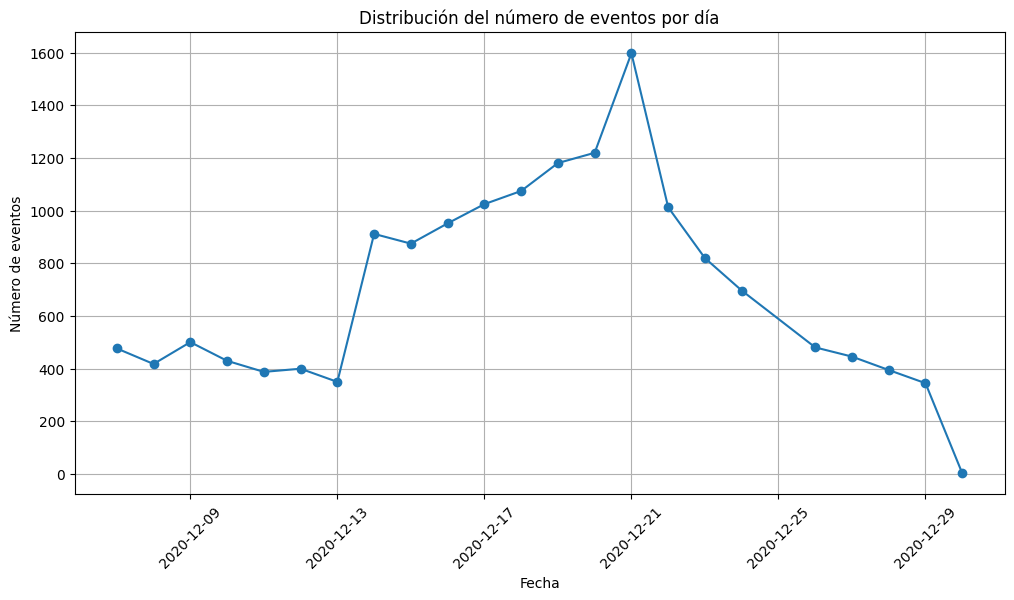

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(eventos_por_dia['dia'], eventos_por_dia['num_events'], marker='o')
plt.xlabel('Fecha')
plt.ylabel('Número de eventos')
plt.title('Distribución del número de eventos por día')
plt.xticks(rotation=45)
plt.grid(True)

----
Podemos ver que a partir del 13/diciembre/2020 empieza a subir rapidamente el numero de eventos y a aprtir del 21/diciembre/2020 empieza a bajar igual de rapido.

----

**¿Hay alguna peculiaridad en los datos que hay que tener en cuenta antes de iniciar la prueba A/B?**

----
Sí, hay varias peculiaridades importantes que deben tenerse en cuenta antes de iniciar la prueba A/B:

1.  **Anomalía en la Conversión (`purchase` sin `product_cart`)**: Hemos identificado que **13,169 usuarios** realizaron una compra (`purchase`) sin haber pasado por la etapa de `product_cart` (agregar al carrito). Esto es inusual en un embudo de ventas típico y podría indicar problemas en el registro de eventos, flujos de usuario alternativos no contemplados, o fallos en el sistema de seguimiento.

2.  **Distribución Desigual de Usuarios en los Grupos de Prueba**: Los grupos de la prueba A/B (`recommender_system_test`) están muy desequilibrados:
    *   **Grupo A (control)**: 2747 usuarios
    *   **Grupo B (experimental)**: 928 usuarios
      
    Esta diferencia en el tamaño de las muestras puede afectar la validez estadística de los resultados de la prueba A/B, haciendo que sea más difícil detectar diferencias significativas o llevando a conclusiones erróneas. Para una prueba A/B válida, los grupos deberían ser de tamaño similar y estar balanceados.

3.  **Distribución de Eventos a lo largo del Tiempo**: El gráfico de la distribución de eventos por día muestra una caída abrupta en el número de eventos hacia el final del período de datos. Esto podría indicar que la prueba se detuvo antes de tiempo, que hubo problemas de recolección de datos, o que factores externos estacionales están influyendo en el comportamiento del usuario.

----

## Evaluacion de los resultados de la prueba A/B

**¿Qué puedes decir sobre los resultados de la prueba A/B?**

----
Debido a estas importantes anomalías, **no es posible extraer conclusiones válidas o fiables sobre los resultados de la prueba A/B** en su estado actual. Abordar la anomalía del embudo, asegurar un balance adecuado en los grupos y verificar la integridad de la recolección de datos son pasos esenciales antes de proceder con una evaluación estadística significativa.

----

**Utiliza una prueba z para comprobar la diferencia estadística entre las proporciones.**

In [30]:
from statsmodels.stats.proportion import proportions_ztest

# Definir el nivel de significancia
alpha = 0.05  # Nivel de significancia común para pruebas A/B

# Obtener el número total de usuarios únicos en cada grupo de prueba
# Estos serán nuestras 'nobs' (número de observaciones totales) para cada grupo
total_usuarios_A = participantes_prueba.query('group=="A"')['user_id'].nunique()
total_usuarios_B = participantes_prueba.query('group=="B"')['user_id'].nunique()

print(f"Total de usuarios únicos en el Grupo A: {total_usuarios_A}")
print(f"Total de usuarios únicos en el Grupo B: {total_usuarios_B}")

Total de usuarios únicos en el Grupo A: 2747
Total de usuarios únicos en el Grupo B: 928


In [31]:
# Comparación para la etapa 'product_page' (visitas a la página del producto)
# Contar usuarios únicos que llegaron a la etapa 'product_page' en cada grupo
product_page_usuarios_A = tabla_combinada.query('group=="A" and event_name=="product_page"')['user_id'].nunique()
product_page_usuarios_B = tabla_combinada.query('group=="B" and event_name=="product_page"')['user_id'].nunique()

print(f"Usuarios únicos en 'product_page' Grupo A: {product_page_usuarios_A}")
print(f"Usuarios únicos en 'product_page' Grupo B: {product_page_usuarios_B}")

# Realizar la prueba Z para la conversión a product_page
# count: usuarios que llegaron a product_page
# nobs: total de usuarios únicos en el grupo
count_product_page = [product_page_usuarios_A, product_page_usuarios_B]
nobs_product_page = [total_usuarios_A, total_usuarios_B]

z_stat_pp, p_value_pp = proportions_ztest(count_product_page, nobs_product_page)

print(f'Prueba Z para la conversión a product_page: p-value = {p_value_pp:}')
if p_value_pp < alpha:
  print('Se rechaza la hipótesis nula: Hay una diferencia significativa en la conversión a product_page.')
else:
  print('No se rechaza la hipótesis nula: No hay diferencia significativa en la conversión a product_page.')


Usuarios únicos en 'product_page' Grupo A: 1780
Usuarios únicos en 'product_page' Grupo B: 523
Prueba Z para la conversión a product_page: p-value = 4.310980554712425e-06
Se rechaza la hipótesis nula: Hay una diferencia significativa en la conversión a product_page.


In [32]:
# Comparación para la etapa 'product_cart' (agregar artículos al carrito)
# Contar usuarios únicos que llegaron a la etapa 'product_cart' en cada grupo
product_cart_usuarios_A = tabla_combinada.query('group=="A" and event_name=="product_cart"')['user_id'].nunique()
product_cart_usuarios_B = tabla_combinada.query('group=="B" and event_name=="product_cart"')['user_id'].nunique()

print(f"Usuarios únicos en 'product_cart' Grupo A: {product_cart_usuarios_A}")
print(f"Usuarios únicos en 'product_cart' Grupo B: {product_cart_usuarios_B}")

# Realizar la prueba Z para la conversión a product_cart
count_product_cart = [product_cart_usuarios_A, product_cart_usuarios_B]
nobs_product_cart = [total_usuarios_A, total_usuarios_B]

z_stat_pc, p_value_pc = proportions_ztest(count_product_cart, nobs_product_cart)

print(f'Prueba Z para la conversión a product_cart: p-value = {p_value_pc:.4f}')
if p_value_pc < alpha:
  print('Se rechaza la hipótesis nula: Hay una diferencia significativa en la conversión a product_cart.')
else:
  print('No se rechaza la hipótesis nula: No hay diferencia significativa en la conversión a product_cart.')


Usuarios únicos en 'product_cart' Grupo A: 824
Usuarios únicos en 'product_cart' Grupo B: 255
Prueba Z para la conversión a product_cart: p-value = 0.1453
No se rechaza la hipótesis nula: No hay diferencia significativa en la conversión a product_cart.


In [33]:
# Comparación para la etapa 'purchase' (finalización de compras)
# Contar usuarios únicos que llegaron a la etapa 'purchase' en cada grupo
purchase_usuarios_A = tabla_combinada.query('group=="A" and event_name=="purchase"')['user_id'].nunique()
purchase_usuarios_B = tabla_combinada.query('group=="B" and event_name=="purchase"')['user_id'].nunique()

print(f"Usuarios únicos en 'purchase' Grupo A: {purchase_usuarios_A}")
print(f"Usuarios únicos en 'purchase' Grupo B: {purchase_usuarios_B}")

# Realizar la prueba Z para la conversión a purchase
count_purchase = [purchase_usuarios_A, purchase_usuarios_B]
nobs_purchase = [total_usuarios_A, total_usuarios_B]

z_stat_p, p_value_p = proportions_ztest(count_purchase, nobs_purchase)

print(f'Prueba Z para la conversión a purchase: p-value = {p_value_p:.4f}')
if p_value_p < alpha:
  print('Se rechaza la hipótesis nula: Hay una diferencia significativa en la conversión a purchase.')
else:
  print('No se rechaza la hipótesis nula: No hay diferencia significativa en la conversión a purchase.')

Usuarios únicos en 'purchase' Grupo A: 872
Usuarios únicos en 'purchase' Grupo B: 256
Prueba Z para la conversión a purchase: p-value = 0.0176
Se rechaza la hipótesis nula: Hay una diferencia significativa en la conversión a purchase.


<div class="alert alert-block alert-success">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Gran trabajo complementando con el calculo de la z-score y con el desarrollo de la prueba de hipótesis. Ya solamente para terminar de complementar el análisis puedes desarrollar algunas gráficas para mostrar el embudo de usuarios entre etapas


## Conclusiones

**El EDA reveló varias peculiaridades y problemas que comprometen la validez de la prueba A/B:**
1. Anomalía en el Embudo de Conversión (purchase sin product_cart).

2. Distribución Desigual de Usuarios en los Grupos de Prueba Los grupos de la prueba A/B (recommender_system_test) presentaron un desequilibrio considerable.

3. Distribución Irregular de Eventos a lo largo del Tiempo.

**Conclusiones de los Resultados de la Prueba A/B:**

Las pruebas Z para la diferencia de proporciones en cada etapa de conversión arrojaron los siguientes resultados:

1. Conversión a product_page (Visitas a la página del producto):

* Resultado: Existe una diferencia estadísticamente significativa. Sin embargo, el Grupo A (control) tuvo una tasa de conversión superior (64.79%) en comparación con el Grupo B (experimental, 56.36%). El Grupo B no solo no mostró el 10% de aumento esperado, sino que su rendimiento fue un 13.01% inferior al control.

2. Conversión a product_cart (Añadir al carrito):

* Resultado: No se encontró una diferencia estadísticamente significativa entre los grupos. El Grupo B tuvo una tasa ligeramente inferior (27.48% vs 29.99% en el Grupo A).

3. Conversión a purchase (Finalización de compra):

* Resultado: Existe una diferencia estadísticamente significativa. Al igual que en la product_page, el Grupo A (control) tuvo una tasa de conversión superior (31.74%) en comparación con el Grupo B (experimental, 27.59%). El Grupo B no alcanzó el objetivo del 10% de aumento y su rendimiento fue un 13.07% inferior al control.

**Conclusión General y Recomendaciones:**

Basándonos en estos resultados, el nuevo sistema de recomendaciones implementado en el Grupo B no solo no logró el objetivo de un aumento del 10% en ninguna de las etapas clave (visita a la página del producto, añadir al carrito y compra), sino que en las etapas de product_page y purchase mostró un rendimiento estadísticamente inferior al sistema de control. Para la etapa de product_cart, no se encontró una diferencia significativa.

Sin embargo, debido a las graves anomalías identificadas durante el EDA (desequilibrio de grupos, problemas de tracking en el embudo y distribución irregular de eventos en el tiempo), estos resultados no son fiables. Es crucial abordar estas cuestiones antes de tomar cualquier decisión basada en esta prueba.

**Recomendaciones:**

1. Investigar y Corregir la Anomalía del Embudo: Entender por qué tantos usuarios compran sin añadir al carrito. Esto podría implicar corregir el tracking de eventos o ajustar la definición del embudo si existen flujos de compra legítimos que no pasan por product_cart.

2. Re-ejecutar la Prueba A/B con Grupos Balanceados: Realizar una nueva prueba asegurando que los grupos de control y experimental tengan un tamaño similar y estén distribuidos aleatoriamente para garantizar la validez estadística.

3. Establecer Criterios Claros de Finalización de la Prueba: Asegurar que la prueba corra durante un tiempo suficiente para alcanzar la significancia estadística y que no se detenga prematuramente.